In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [9]:
df['dri_score'].value_counts()

dri_score
Intermediate                                         10436
N/A - pediatric                                       4779
High                                                  4701
N/A - non-malignant indication                        2427
TBD cytogenetics                                      2003
Low                                                   1926
High - TED AML case <missing cytogenetics             1414
Intermediate - TED AML case <missing cytogenetics      481
N/A - disease not classifiable                         272
Very high                                              198
Missing disease status                                   9
Name: count, dtype: int64

In [11]:
df['tbi_status'].value_counts()

tbi_status
No TBI                              18861
TBI + Cy +- Other                    6104
TBI +- Other, <=cGy                  1727
TBI +- Other, >cGy                   1700
TBI +- Other, -cGy, single            134
TBI +- Other, -cGy, fractionated      119
TBI +- Other, -cGy, unknown dose       79
TBI +- Other, unknown dose             76
Name: count, dtype: int64

In [13]:
df.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


In [15]:
df.describe(include='all')

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
count,28800.000000,28646,26738,20732,26681,24180.000000,22971.000000,28800,26598,25530.000000,...,17404,28642,27395,25147.000000,26258,25448.000000,26753,23736.000000,28800.000000,28800.000000
unique,NaN,11,3,7,3,NaN,NaN,8,3,NaN,...,4,3,2,NaN,3,NaN,3,NaN,NaN,NaN
top,NaN,Intermediate,No,Poor,No,NaN,NaN,No TBI,No,NaN,...,Permissive mismatched,Related,"N/A, Mel not given",NaN,No,NaN,No,NaN,NaN,NaN
freq,NaN,10436,23005,8802,22201,NaN,NaN,18861,25203,NaN,...,12936,16208,20135,NaN,24592,NaN,21338,NaN,NaN,NaN
mean,14399.500000,NaN,NaN,NaN,NaN,1.764516,6.876801,NaN,NaN,5.143322,...,NaN,NaN,NaN,6.903448,NaN,1.707128,NaN,8.664687,0.539306,23.237678
std,8313.988213,NaN,NaN,NaN,NaN,0.431941,1.564313,NaN,NaN,1.207757,...,NaN,NaN,NaN,1.565017,NaN,0.461179,NaN,1.882746,0.498461,24.799748
min,0.000000,NaN,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,2.000000,...,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,4.000000,0.000000,0.333000
25%,7199.750000,NaN,NaN,NaN,NaN,2.000000,6.000000,NaN,NaN,4.000000,...,NaN,NaN,NaN,6.000000,NaN,1.000000,NaN,7.000000,0.000000,5.619750
50%,14399.500000,NaN,NaN,NaN,NaN,2.000000,8.000000,NaN,NaN,6.000000,...,NaN,NaN,NaN,8.000000,NaN,2.000000,NaN,10.000000,1.000000,9.796500
75%,21599.250000,NaN,NaN,NaN,NaN,2.000000,8.000000,NaN,NaN,6.000000,...,NaN,NaN,NaN,8.000000,NaN,2.000000,NaN,10.000000,1.000000,35.100000


<Axes: xlabel='age_at_hct', ylabel='Count'>

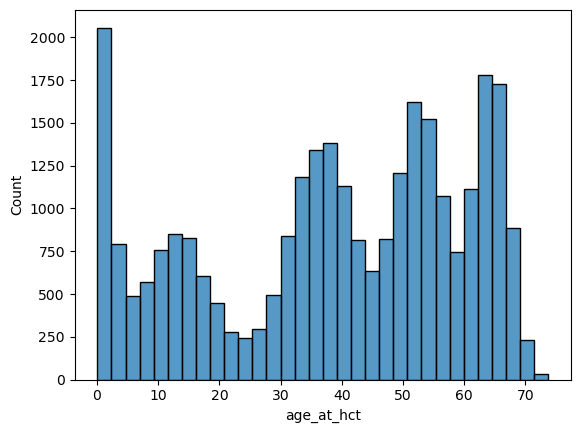

In [19]:
sns.histplot(data= df, x = 'age_at_hct')

<Axes: xlabel='efs_time', ylabel='Count'>

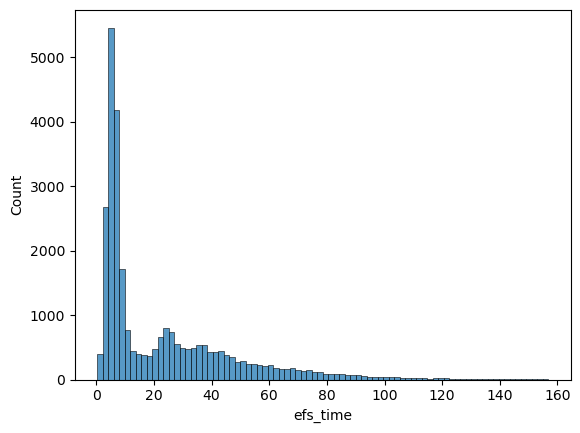

In [21]:
sns.histplot(data=df, x = 'efs_time')